In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)


/Users/natalied/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Exploring the data

In [147]:
# Description of data

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [127]:
# Data and target keys

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

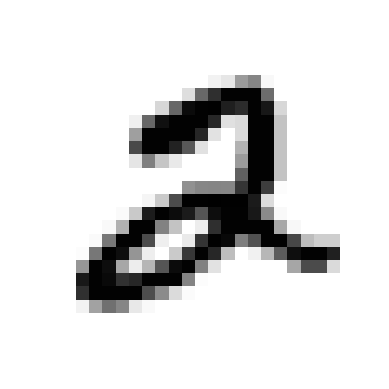

In [88]:
# Looking at some image from the dataset

some_digit = X[5]
some_digit_image = some_digit.reshape (28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
# Looks like 2, is it? Yes.
y[5]

'2'

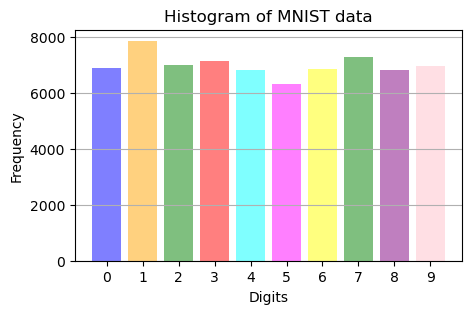

In [56]:
# Histogram of MNIST data

plt.figure(figsize=(5, 3))
bar_colors = ['blue', 'orange', 'green', 'red', 'cyan', 'magenta', 'yellow', 'green' , 'purple', 'pink', 'brown']
plt.bar(range(10), label_counts, color=bar_colors, alpha=0.5)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Histogram of MNIST data')
plt.xticks(range(10))
plt.grid(axis='y')
plt.show()


In [137]:
# Taking less of data for the training to run faster

X_train, X_test, y_train, y_test = X[:6000], X[6000:7000], y[:6000], y[6000:7000]
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


# Standardizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


In [10]:
# Doublechecking if training went well

X_train.shape

(6000, 784)

In [11]:
X_test.shape

(1000, 784)

# Training models

## 1. Stochastic Gradient Descent Classifier

In [143]:
# Creating a model and evaluating it 
# Finding the best parameter for the model

sgdc = SGDClassifier

sgdc_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

sgdc_grid_search = GridSearchCV(sgdc(random_state=42), sgdc_param_grid, cv=5)
sgdc_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [144]:
# Best model and hyperparameter

sgdc_best_model = sgdc_grid_search.best_estimator_
sgdc_best_alpha = sgdc_grid_search.best_params_['alpha']

In [145]:
sgdc_y_pred = sgdc_best_model.predict(X_test_scaled)

In [146]:
sgdc_accuracy = accuracy_score(y_test, sgdc_y_pred)

print("Accuracy:", sgdc_accuracy)
print("Best alpha:", sgdc_best_alpha)

Accuracy: 0.8961428571428571
Best alpha: 0.001


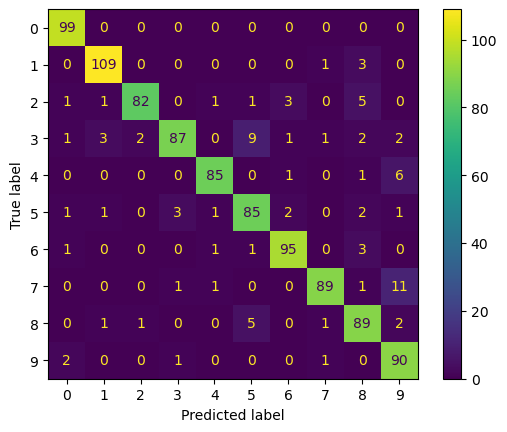

In [128]:
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_y_pred)

ConfusionMatrixDisplay(sgdc_conf_matrix).plot()

## 2. Logistic Regression

In [99]:
# Creating a model and evaluating it 
# Finding the best parameter for the model

log_reg = LogisticRegression(max_iter=1000)

log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=5)
log_reg_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [105]:
# Best model and parameters

log_reg_best_model = log_reg_grid_search.best_estimator_
log_reg_best_c = log_reg_grid_search.best_params_['C']


In [107]:
log_reg_y_pred = log_reg_best_model.predict(X_test_scaled)

In [110]:
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)

print("Accuracy:", log_reg_accuracy)
print("Best C value:", log_reg_best_c)

Accuracy: 0.914
Best C: 0.01


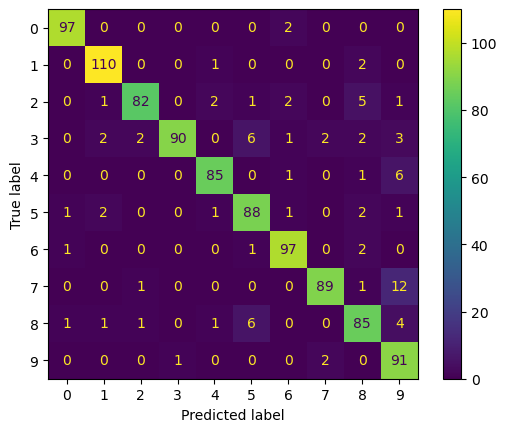

In [129]:
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)

ConfusionMatrixDisplay(log_reg_conf_matrix).plot()

## 3. Support Vector Machines

In [120]:
# Creating a model and evaluating it 
# Finding the best parameters for the model

svc = SVC()

svc_param_grid = {'C': [0.025, 0.05, 0.1, 0.15, 1, 10],
                  'gamma': [0.01, 0.1, 0.25, 0.5, 1],
                  'kernel': ['linear', 'rbf', 'poly']}
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5, n_jobs=-1)
svc_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.025, 0.05, 0.1, 0.15, 1, 10],
                         'gamma': [0.01, 0.1, 0.25, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [160]:
# Best model and parameters

svc_best_model = svc_grid_search.best_estimator_
svc_best_param_grid = svc_grid_search.best_params_

In [161]:
svc_y_pred = svc_best_model.predict(X_test_scaled)

In [163]:
svc_accuracy = accuracy_score(y_test, svc_y_pred)

print("Accuracy:", svc_accuracy)
print("Best parameters:", svc_best_param_grid)

Accuracy: 0.9487857142857142
Best parameters: {'C': 0.025, 'gamma': 0.1, 'kernel': 'poly'}


In [124]:
svc_conf_matrix = confusion_matrix(y_test, svc_y_pred)

log_reg_conf_matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 111   0   0   1   0   0   0   1   0]
 [  1   0  84   0   2   0   2   0   4   1]
 [  2   1   2  93   0   2   0   2   5   1]
 [  0   0   0   0  92   0   0   0   0   1]
 [  1   0   0   0   0  92   2   0   1   0]
 [  0   0   0   0   0   0 100   0   1   0]
 [  0   0   0   0   4   0   0  85   1  13]
 [  0   1   1   0   0   1   0   0  94   2]
 [  0   0   1   0   1   0   0   1   0  91]]


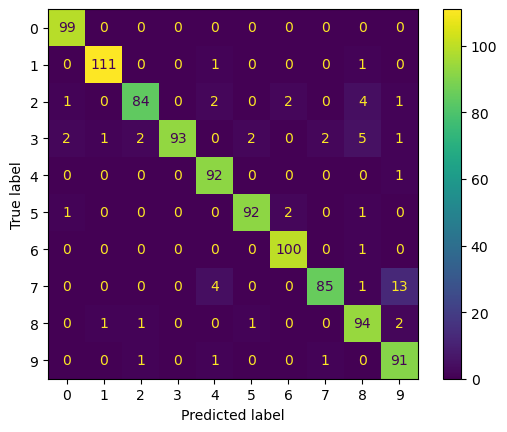

In [130]:
svc_conf_matrix = confusion_matrix(y_test, svc_y_pred)

ConfusionMatrixDisplay(svc_conf_matrix).plot()

# Testing chosen model

In [169]:
# The model with the highest precision is Support Vector Machines

test_pred_y = svc_grid_search.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred_y)

print ("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9487857142857142


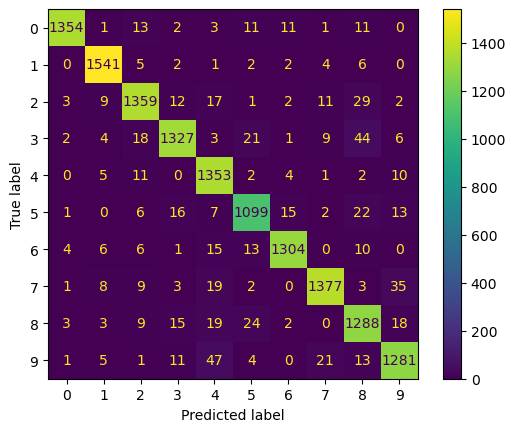

In [168]:
cm_final = confusion_matrix(y_test, test_pred_y)
ConfusionMatrixDisplay(cm_final).plot()